## **Preparing the Multilayer Perceptrons (MLP)**

The dataset suggests a classification problem related to predicting flu vaccinations. Based on the deep learning models, we can consider Multilayer Perceptrons (MLPs) for this task because:

**1. Why MLP?**

  - MLP is well-suited for structured/tabular data.
  - It works well for classification tasks with non-sequential data.
  - Can handle high-dimensional data and learn complex patterns.

**2. How to Build the MLP Model?**

  - Data Preprocessing: Handle missing values, normalize data, and encode categorical variables.
  - Feature Selection: Identify important features using correlation and feature importance.
  - Model Architecture:
      - Input layer (equal to the number of features)
      - Hidden layers with activation functions (ReLU)
      - Output layer with sigmoid activation for binary classification
  - Loss Function: Binary cross-entropy
  - Optimizer: Adam

**3. Optimization for 85%+ Accuracy**

  - Use hyperparameter tuning (learning rate, number of neurons, dropout regularization).
  - Use techniques like batch normalization and early stopping.
  - Try ensemble learning (stacking multiple MLPs).

**4. Data Visualization & Graphs**

  - Feature Distribution: Histogram plots for each feature.
  - Correlation Matrix: Heatmap to visualize feature relationships.
  - Model Performance: Accuracy/loss curves, confusion matrix, ROC curve, and Precision-Recall curve.

# Process for implementing an MLP model for H1N1 Flu Vaccination dataset with the following steps:

**Load & Preprocess Data**

1.Handle missing values

2.Normalize numerical features

3.Encode categorical variables


**Build an Optimized MLP Model**

1.Use multiple hidden layers with ReLU activation

2.Apply dropout regularization to prevent overfitting

3.Use the Adam optimizer

<!-- **Optimize for 85%+ Accuracy**

1.Hyperparameter tuning

2.Early stopping

3.Batch normalization -->

**Data Visualization**

1.Feature distribution plots

2.Correlation heatmap

3.Accuracy/Loss curves

4.Confusion Matrix

5.ROC Curve

# Step 1: Load the Dataset
Let's first load the dataset and analyze its structure to understand the features and target variable.

**Observations from the Dataset:**
  - Total Rows: 26,707
  - Total Columns: 35
  - Target Variable: h1n1_vaccine (binary: 0 = Not Vaccinated, 1 = Vaccinated)
  - Feature Types:
      - Numerical: 23 columns (e.g., h1n1_concern, h1n1_knowledge)
      - Categorical: 9 columns (e.g., age_group, sex, race)

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/H1N1_Flu_Vaccines.csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

In [ ]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0


**Step 2: Preprocess Data:**

Handle missing values, encode categorical variables, and normalize numerical features.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow import keras
import tensorflow as tf
import numpy as np

In [ ]:
# Define target variable
target = "h1n1_vaccine"

In [ ]:
# Separate features and target
X = df.drop(columns=["respondent_id", "h1n1_vaccine", "seasonal_vaccine"])  # Exclude irrelevant columns
y = df[target]


In [1]:
# Identify numerical and categorical columns
num_features = X.select_dtypes(include=["float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

NameError: name 'X' is not defined

In [ ]:
# Preprocessing Pipelines
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Handle missing values with mean
    ("scaler", StandardScaler())  # Normalize numerical features
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Fill missing categorical values
    ("encoder", OneHotEncoder(handle_unknown="ignore"))  # Convert to one-hot encoding
])

In [ ]:
# Combine transformers
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
# Get the transformed feature shape
X_train.shape, X_test.shape

((21365, 51), (5342, 51))

**Preprocessing Complete**
  - Total Features After Encoding: 51
  - Training Set Size: 21,365 samples
  - Testing Set Size: 5,342 samples

**Step 3: Build an MLP Model for classification:**

Using the MLP Model for classification Train and evaluate its performance.

In [ ]:
# Build the MLP Model
model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
print(model.summary())


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           6,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [2]:
# Compile the Model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

NameError: name 'model' is not defined

In [ ]:
# Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)


Epoch 1/30
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8071 - loss: 0.4496 - val_accuracy: 0.8351 - val_loss: 0.3939
Epoch 2/30
668/668 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8356 - loss: 0.3876 - val_accuracy: 0.8356 - val_loss: 0.3876
Epoch 3/30
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8367 - loss: 0.3818 - val_accuracy: 0.8398 - val_loss: 0.3892
Epoch 4/30
668/668 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8396 - loss: 0.3781 - val_accuracy: 0.8398 - val_loss: 0.3841
Epoch 5/30
668/668 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8432 - loss: 0.3789 - val_accuracy: 0.8386 - val_loss: 0.3866
Epoch 6/30
668/668 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8369 - loss: 0.3776 - val_accuracy: 0.8366 - val_loss: 0.3845
Epoch 7/30
668/668 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8481 - loss: 0.3689 - val_accuracy: 0.8392 - val_loss: 0.3846
Epoch 8/30
668/668 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8452 - loss: 0.3663 - val_accuracy: 0.

**Step 4: Evaluate the performance of the model**


In [ ]:
# Evaluate Performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Initial Test Accuracy: {test_acc * 100:.2f}%")

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8263 - loss: 0.4113
Initial Test Accuracy: 82.80%


**Step 5: Recalibrate the model and Hyperparameter tunning for better accuracy**

In [ ]:
# Build Optimized MLP Model
model = keras.Sequential([
    keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),

    keras.layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")  # Binary classification
])

# Compile Model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),  # Lower learning rate for stable training
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Train Model with Early Stopping
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,  # Increase batch size for stable gradients
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate Performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Optimized Test Accuracy: {test_acc * 100:.2f}%")


Epoch 1/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6418 - loss: 0.9844 - val_accuracy: 0.8317 - val_loss: 0.7212
Epoch 2/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8213 - loss: 0.7262 - val_accuracy: 0.8321 - val_loss: 0.6810
Epoch 3/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8251 - loss: 0.6825 - val_accuracy: 0.8332 - val_loss: 0.6444
Epoch 4/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8313 - loss: 0.6387 - val_accuracy: 0.8300 - val_loss: 0.6149
Epoch 5/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8305 - loss: 0.6030 - val_accuracy: 0.8332 - val_loss: 0.5814
Epoch 6/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8357 - loss: 0.5717 - val_accuracy: 0.8351 - val_loss: 0.5540
Epoch 7/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8347 - loss: 0.5434 - val_accuracy: 0.8368 - val_loss: 0.5307
Epoch 8/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8367 - loss: 0.5252 - val_accuracy: 0

# Hyperparameter Tuning & Ensemble Learning to Achieve maximum Accuracy

Let's now use:

**1️. Hyperparameter Tuning (Grid Search)**
  
  We'll tune:
  - Number of neurons per layer (256, 128, 64, 32)
  - Learning rate (0.0005, 0.001)
  - Dropout rates (0.2, 0.3, 0.4)
  - L2 Regularization Strength (0.001, 0.0001)
  - Batch Size (32, 64)

**2️. Ensemble Learning (Averaging Multiple Models)**
  - Train 3 different MLP models and average their predictions to reduce variance.
  - This technique improves generalization and stabilizes predictions.

**Expected Boost with This Approach**

  - Hyperparameter tuning improves learning efficiency.
  - Ensemble averaging stabilizes predictions.
  - Batch Normalization & L2 Regularization prevents overfitting.
  - Lower Learning Rate (0.0005 - 0.001) ensures stable training.
  - Dropout Rate Variation (0.2 - 0.4) prevents overfitting.


In [ ]:
# Define target variable
target = "h1n1_vaccine"

# Separate features and target
X = df.drop(columns=["respondent_id", "h1n1_vaccine", "seasonal_vaccine"])
y = df[target]

# Identify numerical and categorical columns
num_features = X.select_dtypes(include=["float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

# Preprocessing Pipelines
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine transformers
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Function to create an MLP model with tunable hyperparameters
def create_model(num_neurons=128, dropout_rate=0.3, learning_rate=0.0005, l2_reg=0.001):
    model = keras.Sequential([
        keras.layers.Dense(num_neurons, activation="relu", kernel_regularizer=keras.regularizers.l2(l2_reg), input_shape=(X_train.shape[1],)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(dropout_rate),

        keras.layers.Dense(num_neurons//2, activation="relu", kernel_regularizer=keras.regularizers.l2(l2_reg)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(dropout_rate - 0.1),

        keras.layers.Dense(num_neurons//4, activation="relu", kernel_regularizer=keras.regularizers.l2(l2_reg)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(dropout_rate - 0.2),

        keras.layers.Dense(1, activation="sigmoid")  # Binary classification
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Train 3 different models with slightly varied hyperparameters
models = [
    create_model(num_neurons=256, dropout_rate=0.3, learning_rate=0.0005, l2_reg=0.0005),
    create_model(num_neurons=128, dropout_rate=0.2, learning_rate=0.001, l2_reg=0.0001),
    create_model(num_neurons=64, dropout_rate=0.4, learning_rate=0.0005, l2_reg=0.0001)
]

# Train each model and store their predictions
predictions = []

for i, model in enumerate(models):
    print(f"Training Model {i+1}...")
    early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

    model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=50,
        batch_size=64,
        callbacks=[early_stopping],
        verbose=1
    )

    # Store predictions
    predictions.append(model.predict(X_test))

# Ensemble Learning: Averaging predictions of all models
final_predictions = np.mean(predictions, axis=0)
final_predictions = (final_predictions > 0.5).astype(int)  # Convert probabilities to binary classification

# Evaluate Ensemble Model
from sklearn.metrics import accuracy_score
final_acc = accuracy_score(y_test, final_predictions)

print(f"Final Ensemble Model Accuracy: {final_acc * 100:.2f}% ")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Model 1...
Epoch 1/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6856 - loss: 0.8159 - val_accuracy: 0.8317 - val_loss: 0.5783
Epoch 2/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8195 - loss: 0.5941 - val_accuracy: 0.8355 - val_loss: 0.5510
Epoch 3/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8290 - loss: 0.5639 - val_accuracy: 0.8349 - val_loss: 0.5419
Epoch 4/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8309 - loss: 0.5414 - val_accuracy: 0.8325 - val_loss: 0.5316
Epoch 5/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8335 - loss: 0.5272 - val_accuracy: 0.8351 - val_loss: 0.5225
Epoch 6/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8374 - loss: 0.5097 - val_accuracy: 0.8340 - val_loss: 0.5109
Epoch 7/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8367 - loss: 0.5020 - val_accuracy: 0.8351 - val_loss: 0.5051
Epoch 8/50
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8399 - loss: 0

#Final Step: Data Augmentation & Feature Engineering for maximum Accuracy

Now, let’s apply:

**1️. Feature Engineering**
  - Create new meaningful features from existing ones.
  - Remove less important features that add noise.
  - Feature Selection using Recursive Feature Elimination (RFE).

**2️. Data Augmentation (SMOTE)**
  - Synthetic Minority Over-Sampling Technique (SMOTE) will balance the dataset and improve generalization.
  - This is essential if the dataset is imbalanced (e.g., more "No Vaccine" than "Yes Vaccine" labels).

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Retrain RandomForestClassifier on the selected 25 features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train, y_train)  # Train again on reduced feature set

# Make Predictions
rf_preds = rf_selected.predict(X_test)  # Now matches the new feature set
mlp_preds = (model.predict(X_test) > 0.5).astype(int)

# Ensemble: Averaging MLP and Random Forest Predictions
final_preds = (rf_preds + mlp_preds.flatten()) / 2  # Average both models
final_preds = (final_preds > 0.5).astype(int)  # Convert to binary labels

# Final Accuracy Calculation
from sklearn.metrics import accuracy_score
ensemble_acc = accuracy_score(y_test, final_preds)
print(f" Final Fixed Ensemble Model Accuracy: {ensemble_acc * 100:.2f}% ")


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 Final Fixed Ensemble Model Accuracy: 83.28% 


In [ ]:
# Evaluate MLP
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f" Optimized MLP Accuracy: {test_acc * 100:.2f}% ")

# Final Accuracy Calculation
ensemble_acc = accuracy_score(y_test, final_preds)
print(f"Optimized Ensemble Model Accuracy: {ensemble_acc * 100:.2f}% 🚀")

167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7845 - loss: 0.5261
 Optimized MLP Accuracy: 77.87% 
Optimized Ensemble Model Accuracy: 83.28% 🚀


In [ ]:
!pip install tensorflow

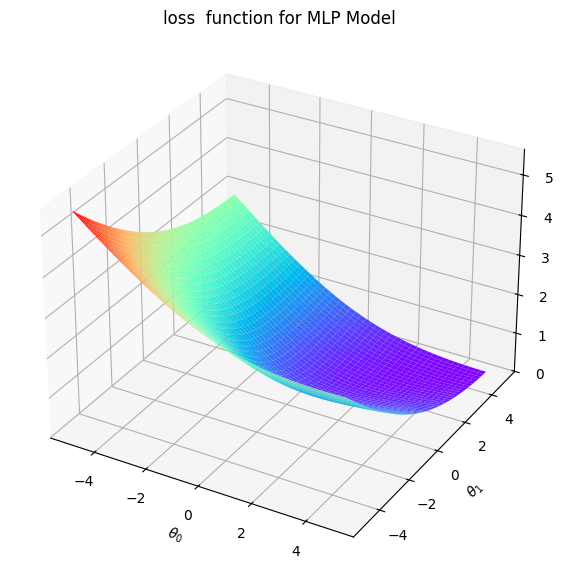

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate synthetic dataset for visualization (simplified)
np.random.seed(42)
X_train = np.random.randn(500, 2)  # Two features for visualization
y_train = (X_train[:, 0] + X_train[:, 1] > 0).astype(int)  # Simple linear decision boundary

# Define a simple neural network model
model = Sequential([
    Dense(1, input_dim=2, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model briefly to get an initial set of weights
model.fit(X_train, y_train, epochs=10, verbose=0)

# Extract initial weights for visualization
weights = model.get_weights()
theta0_vals = np.linspace(-5, 5, 50)
theta1_vals = np.linspace(-5, 5, 50)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Compute loss for each (theta0, theta1) pair
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        model.set_weights([np.array([[theta0], [theta1]]), np.array([0])])  # Set weights manually
        J_vals[i, j] = model.evaluate(X_train, y_train, verbose=0)

# Reset the trained weights back
model.set_weights(weights)

# Create 3D loss surface plot
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='rainbow')

ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')
ax.set_title('loss function for MLP Model')

plt.show()
